In [1]:
#implement callbacks including early stopping and/or not introduce k folds (probs both)

#add units to graphs
"""Ask Maira for Transfer Learning paper

Notify that the marking sheet is out but not specifically how the abstract is marked

Abstact template includes work experience history, 
is it in relation to the project or like a resume that is relevant to your degree? work experience

Check that it is a modelling project for final report 
if so, should I change the heading of methodology to model formulation to match the marking guide?

EXPERIMENTAL


BY MONDAY
REMOVE TSS
CHECK lag
REMOVE OUTLIER TURBDITY"""

'Ask Maira for Transfer Learning paper\n\nNotify that the marking sheet is out but not specifically how the abstract is marked\n\nAbstact template includes work experience history, \nis it in relation to the project or like a resume that is relevant to your degree? work experience\n\nCheck that it is a modelling project for final report \nif so, should I change the heading of methodology to model formulation to match the marking guide?\n\nEXPERIMENTAL\n\n\nBY MONDAY\nREMOVE TSS\nCHECK lag\nREMOVE OUTLIER TURBDITY'

In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [3]:
df = pd.read_csv(os.path.join("data", "final_df_big.csv"))

In [4]:
df_no_date = df.drop(columns=['Date'])

x_arr = np.array(df_no_date.drop(columns=['Turbidity (NTU)']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['Turbidity (NTU)'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [5]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         32700     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()]
        )

In [7]:
models = []
histories = []  
model_evals = []
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]
    
    history = model.fit(x_train,y_train,epochs=200)
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/200
1110/1110 [==============================] - 7s 4ms/step - loss: 1838.9019 - root_mean_squared_error: 42.8824
Epoch 2/200
1110/1110 [==============================] - 5s 4ms/step - loss: 669.3005 - root_mean_squared_error: 25.8708
Epoch 3/200
1110/1110 [==============================] - 5s 4ms/step - loss: 573.9541 - root_mean_squared_error: 23.9573
Epoch 4/200
1110/1110 [==============================] - 5s 4ms/step - loss: 516.3738 - root_mean_squared_error: 22.7239
Epoch 5/200
1110/1110 [==============================] - 5s 4ms/step - loss: 472.3455 - root_mean_squared_error: 21.7335
Epoch 6/200
1110/1110 [==============================] - 5s 4ms/step - loss: 435.1259 - root_mean_squared_error: 20.8597
Epoch 7/200
1110/1110 [==============================] - 5s 4ms/step - loss: 404.9454 - root_mean_squared_error: 20.1233
Epoch 8/200
1110/1110 [==============================] - 5s 4ms/step - loss: 378.9796 - root_mean_squared_error: 19.4674
Epoch 9/200
1110/1110 [========

1110/1110 [==============================] - 5s 5ms/step - loss: 131.4514 - root_mean_squared_error: 11.4652
Epoch 69/200
1110/1110 [==============================] - 5s 5ms/step - loss: 130.2700 - root_mean_squared_error: 11.4136
Epoch 70/200
1110/1110 [==============================] - 5s 5ms/step - loss: 129.8877 - root_mean_squared_error: 11.3968
Epoch 71/200
1110/1110 [==============================] - 5s 5ms/step - loss: 128.4876 - root_mean_squared_error: 11.3352
Epoch 72/200
1110/1110 [==============================] - 5s 5ms/step - loss: 127.9750 - root_mean_squared_error: 11.3126
Epoch 73/200
1110/1110 [==============================] - 5s 5ms/step - loss: 127.7450 - root_mean_squared_error: 11.3024
Epoch 74/200
1110/1110 [==============================] - 5s 5ms/step - loss: 125.9721 - root_mean_squared_error: 11.2237
Epoch 75/200
1110/1110 [==============================] - 5s 5ms/step - loss: 125.6325 - root_mean_squared_error: 11.2086
Epoch 76/200
1110/1110 [=============

1110/1110 [==============================] - 5s 5ms/step - loss: 89.5970 - root_mean_squared_error: 9.4656
Epoch 136/200
1110/1110 [==============================] - 5s 5ms/step - loss: 89.1141 - root_mean_squared_error: 9.4400
Epoch 137/200
1110/1110 [==============================] - 5s 5ms/step - loss: 88.5112 - root_mean_squared_error: 9.4080
Epoch 138/200
1110/1110 [==============================] - 5s 5ms/step - loss: 88.6721 - root_mean_squared_error: 9.4166
Epoch 139/200
1110/1110 [==============================] - 5s 5ms/step - loss: 87.1008 - root_mean_squared_error: 9.3328
Epoch 140/200
1110/1110 [==============================] - 5s 5ms/step - loss: 87.5603 - root_mean_squared_error: 9.3574
Epoch 141/200
1110/1110 [==============================] - 5s 5ms/step - loss: 87.2375 - root_mean_squared_error: 9.3401
Epoch 142/200
1110/1110 [==============================] - 5s 5ms/step - loss: 86.5142 - root_mean_squared_error: 9.3013
Epoch 143/200
1110/1110 [=====================

Epoch 2/200
1110/1110 [==============================] - 5s 5ms/step - loss: 67.2537 - root_mean_squared_error: 8.2008
Epoch 3/200
1110/1110 [==============================] - 5s 5ms/step - loss: 66.1049 - root_mean_squared_error: 8.1305
Epoch 4/200
1110/1110 [==============================] - 5s 5ms/step - loss: 66.7893 - root_mean_squared_error: 8.1725
Epoch 5/200
1110/1110 [==============================] - 5s 5ms/step - loss: 65.9328 - root_mean_squared_error: 8.1199
Epoch 6/200
1110/1110 [==============================] - 5s 5ms/step - loss: 65.2192 - root_mean_squared_error: 8.0758
Epoch 7/200
1110/1110 [==============================] - 5s 5ms/step - loss: 64.6990 - root_mean_squared_error: 8.0436
Epoch 8/200
1110/1110 [==============================] - 5s 5ms/step - loss: 64.4334 - root_mean_squared_error: 8.0270
Epoch 9/200
1110/1110 [==============================] - 5s 5ms/step - loss: 63.8582 - root_mean_squared_error: 7.9911
Epoch 10/200
1110/1110 [========================

1110/1110 [==============================] - 5s 5ms/step - loss: 46.3419 - root_mean_squared_error: 6.8075
Epoch 71/200
1110/1110 [==============================] - 5s 4ms/step - loss: 46.0444 - root_mean_squared_error: 6.7856
Epoch 72/200
1110/1110 [==============================] - 5s 5ms/step - loss: 45.9384 - root_mean_squared_error: 6.7778
Epoch 73/200
1110/1110 [==============================] - 5s 5ms/step - loss: 46.2254 - root_mean_squared_error: 6.7989
Epoch 74/200
1110/1110 [==============================] - 5s 5ms/step - loss: 45.3012 - root_mean_squared_error: 6.7306
Epoch 75/200
1110/1110 [==============================] - 5s 5ms/step - loss: 45.1916 - root_mean_squared_error: 6.7225
Epoch 76/200
1110/1110 [==============================] - 5s 5ms/step - loss: 44.2408 - root_mean_squared_error: 6.6514
Epoch 77/200
1110/1110 [==============================] - 5s 5ms/step - loss: 44.6083 - root_mean_squared_error: 6.6789
Epoch 78/200
1110/1110 [=============================

1110/1110 [==============================] - 5s 5ms/step - loss: 35.5952 - root_mean_squared_error: 5.9662
Epoch 139/200
1110/1110 [==============================] - 5s 5ms/step - loss: 35.1897 - root_mean_squared_error: 5.9321
Epoch 140/200
1110/1110 [==============================] - 5s 5ms/step - loss: 34.6570 - root_mean_squared_error: 5.8870
Epoch 141/200
1110/1110 [==============================] - 5s 5ms/step - loss: 35.2350 - root_mean_squared_error: 5.9359
Epoch 142/200
1110/1110 [==============================] - 5s 5ms/step - loss: 34.6515 - root_mean_squared_error: 5.8865
Epoch 143/200
1110/1110 [==============================] - 5s 5ms/step - loss: 34.8811 - root_mean_squared_error: 5.9060
Epoch 144/200
1110/1110 [==============================] - 5s 5ms/step - loss: 34.7667 - root_mean_squared_error: 5.8963
Epoch 145/200
1110/1110 [==============================] - 5s 5ms/step - loss: 34.1892 - root_mean_squared_error: 5.8472
Epoch 146/200
1110/1110 [=====================

1110/1110 [==============================] - 5s 5ms/step - loss: 30.9717 - root_mean_squared_error: 5.5652
Epoch 6/200
1110/1110 [==============================] - 5s 5ms/step - loss: 29.9324 - root_mean_squared_error: 5.4711
Epoch 7/200
1110/1110 [==============================] - 5s 5ms/step - loss: 29.4505 - root_mean_squared_error: 5.4268
Epoch 8/200
1110/1110 [==============================] - 5s 5ms/step - loss: 29.9005 - root_mean_squared_error: 5.4681
Epoch 9/200
1110/1110 [==============================] - 5s 5ms/step - loss: 30.1129 - root_mean_squared_error: 5.4875
Epoch 10/200
1110/1110 [==============================] - 5s 5ms/step - loss: 30.1953 - root_mean_squared_error: 5.4950
Epoch 11/200
1110/1110 [==============================] - 5s 5ms/step - loss: 29.6555 - root_mean_squared_error: 5.4457
Epoch 12/200
1110/1110 [==============================] - 5s 5ms/step - loss: 29.3757 - root_mean_squared_error: 5.4199
Epoch 13/200
1110/1110 [==============================] -

1110/1110 [==============================] - 5s 5ms/step - loss: 24.4486 - root_mean_squared_error: 4.9446
Epoch 74/200
1110/1110 [==============================] - 5s 5ms/step - loss: 24.4811 - root_mean_squared_error: 4.9478
Epoch 75/200
1110/1110 [==============================] - 5s 5ms/step - loss: 24.7076 - root_mean_squared_error: 4.9707
Epoch 76/200
1110/1110 [==============================] - 5s 5ms/step - loss: 24.6722 - root_mean_squared_error: 4.9671
Epoch 77/200
1110/1110 [==============================] - 5s 5ms/step - loss: 24.0350 - root_mean_squared_error: 4.9025
Epoch 78/200
1110/1110 [==============================] - 5s 5ms/step - loss: 24.3274 - root_mean_squared_error: 4.9323
Epoch 79/200
1110/1110 [==============================] - 5s 5ms/step - loss: 24.1232 - root_mean_squared_error: 4.9115
Epoch 80/200
1110/1110 [==============================] - 5s 5ms/step - loss: 23.7624 - root_mean_squared_error: 4.8747
Epoch 81/200
1110/1110 [=============================

1110/1110 [==============================] - 5s 5ms/step - loss: 20.4556 - root_mean_squared_error: 4.5228
Epoch 142/200
1110/1110 [==============================] - 5s 5ms/step - loss: 20.0684 - root_mean_squared_error: 4.4798
Epoch 143/200
1110/1110 [==============================] - 5s 5ms/step - loss: 20.2837 - root_mean_squared_error: 4.5037
Epoch 144/200
1110/1110 [==============================] - 5s 5ms/step - loss: 20.3141 - root_mean_squared_error: 4.5071
Epoch 145/200
1110/1110 [==============================] - 5s 5ms/step - loss: 20.3714 - root_mean_squared_error: 4.5135
Epoch 146/200
1110/1110 [==============================] - 5s 5ms/step - loss: 20.1772 - root_mean_squared_error: 4.4919
Epoch 147/200
1110/1110 [==============================] - 5s 5ms/step - loss: 19.9061 - root_mean_squared_error: 4.4616
Epoch 148/200
1110/1110 [==============================] - 5s 5ms/step - loss: 20.2946 - root_mean_squared_error: 4.5050
Epoch 149/200
1110/1110 [=====================

1110/1110 [==============================] - 6s 5ms/step - loss: 18.9577 - root_mean_squared_error: 4.3540
Epoch 9/200
1110/1110 [==============================] - 6s 5ms/step - loss: 19.5178 - root_mean_squared_error: 4.4179
Epoch 10/200
1110/1110 [==============================] - 5s 5ms/step - loss: 19.0182 - root_mean_squared_error: 4.3610
Epoch 11/200
1110/1110 [==============================] - 5s 5ms/step - loss: 18.8236 - root_mean_squared_error: 4.3386
Epoch 12/200
1110/1110 [==============================] - 5s 5ms/step - loss: 18.8475 - root_mean_squared_error: 4.3414
Epoch 13/200
1110/1110 [==============================] - 5s 5ms/step - loss: 18.7851 - root_mean_squared_error: 4.3342
Epoch 14/200
1110/1110 [==============================] - 6s 5ms/step - loss: 18.8089 - root_mean_squared_error: 4.3369
Epoch 15/200
1110/1110 [==============================] - 5s 5ms/step - loss: 19.2740 - root_mean_squared_error: 4.3902
Epoch 16/200
1110/1110 [==============================

1110/1110 [==============================] - 6s 5ms/step - loss: 16.2972 - root_mean_squared_error: 4.0370
Epoch 77/200
1110/1110 [==============================] - 6s 5ms/step - loss: 16.4700 - root_mean_squared_error: 4.0583
Epoch 78/200
1110/1110 [==============================] - 6s 5ms/step - loss: 16.2319 - root_mean_squared_error: 4.0289
Epoch 79/200
1110/1110 [==============================] - 6s 5ms/step - loss: 16.6216 - root_mean_squared_error: 4.0770
Epoch 80/200
1110/1110 [==============================] - 6s 5ms/step - loss: 15.8755 - root_mean_squared_error: 3.9844
Epoch 81/200
1110/1110 [==============================] - 6s 5ms/step - loss: 16.4402 - root_mean_squared_error: 4.0547
Epoch 82/200
1110/1110 [==============================] - 6s 5ms/step - loss: 16.3655 - root_mean_squared_error: 4.0454
Epoch 83/200
1110/1110 [==============================] - 6s 5ms/step - loss: 15.8982 - root_mean_squared_error: 3.9872
Epoch 84/200
1110/1110 [=============================

1110/1110 [==============================] - 6s 5ms/step - loss: 14.2262 - root_mean_squared_error: 3.7718
Epoch 145/200
1110/1110 [==============================] - 6s 5ms/step - loss: 14.3388 - root_mean_squared_error: 3.7867
Epoch 146/200
1110/1110 [==============================] - 6s 5ms/step - loss: 14.1143 - root_mean_squared_error: 3.7569
Epoch 147/200
1110/1110 [==============================] - 6s 5ms/step - loss: 14.0222 - root_mean_squared_error: 3.7446
Epoch 148/200
1110/1110 [==============================] - 6s 6ms/step - loss: 14.2320 - root_mean_squared_error: 3.7725
Epoch 149/200
1110/1110 [==============================] - 6s 5ms/step - loss: 14.3706 - root_mean_squared_error: 3.7909
Epoch 150/200
1110/1110 [==============================] - 6s 5ms/step - loss: 14.4973 - root_mean_squared_error: 3.8075
Epoch 151/200
1110/1110 [==============================] - 6s 5ms/step - loss: 14.3086 - root_mean_squared_error: 3.7827
Epoch 152/200
1110/1110 [=====================

1110/1110 [==============================] - 6s 5ms/step - loss: 13.4197 - root_mean_squared_error: 3.6633
Epoch 12/200
1110/1110 [==============================] - 6s 5ms/step - loss: 13.2442 - root_mean_squared_error: 3.6393
Epoch 13/200
1110/1110 [==============================] - 6s 5ms/step - loss: 13.0693 - root_mean_squared_error: 3.6152
Epoch 14/200
1110/1110 [==============================] - 6s 5ms/step - loss: 13.2218 - root_mean_squared_error: 3.6362
Epoch 15/200
1110/1110 [==============================] - 6s 5ms/step - loss: 13.5599 - root_mean_squared_error: 3.6824
Epoch 16/200
1110/1110 [==============================] - 6s 5ms/step - loss: 13.2492 - root_mean_squared_error: 3.6400
Epoch 17/200
1110/1110 [==============================] - 6s 5ms/step - loss: 13.2934 - root_mean_squared_error: 3.6460
Epoch 18/200
1110/1110 [==============================] - 6s 5ms/step - loss: 12.9878 - root_mean_squared_error: 3.6039
Epoch 19/200
1110/1110 [=============================

1110/1110 [==============================] - 5s 5ms/step - loss: 12.1587 - root_mean_squared_error: 3.4869
Epoch 80/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.7929 - root_mean_squared_error: 3.4341
Epoch 81/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.6222 - root_mean_squared_error: 3.4091
Epoch 82/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.2655 - root_mean_squared_error: 3.3564
Epoch 83/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.5903 - root_mean_squared_error: 3.4044
Epoch 84/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.4234 - root_mean_squared_error: 3.3799
Epoch 85/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.6338 - root_mean_squared_error: 3.4108
Epoch 86/200
1110/1110 [==============================] - 5s 5ms/step - loss: 11.7043 - root_mean_squared_error: 3.4212
Epoch 87/200
1110/1110 [=============================

Epoch 147/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.4057 - root_mean_squared_error: 3.2258
Epoch 148/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.5363 - root_mean_squared_error: 3.2460
Epoch 149/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.7718 - root_mean_squared_error: 3.2820
Epoch 150/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.6116 - root_mean_squared_error: 3.2575
Epoch 151/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.4523 - root_mean_squared_error: 3.2330
Epoch 152/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.6955 - root_mean_squared_error: 3.2704
Epoch 153/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.5106 - root_mean_squared_error: 3.2420
Epoch 154/200
1110/1110 [==============================] - 6s 5ms/step - loss: 10.4986 - root_mean_squared_error: 3.2402
Epoch 155/200
1110/1110 [=======

In [8]:
#check which is best
model_evals

[[81.1192398071289, 9.006622314453125],
 [38.32551574707031, 6.190760612487793],
 [24.906509399414062, 4.990642070770264],
 [28.847017288208008, 5.370942115783691],
 [13.900153160095215, 3.7282910346984863]]

In [9]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

In [10]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [15]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [12]:
def check_file(fpath):
    return os.path.exists(fpath)

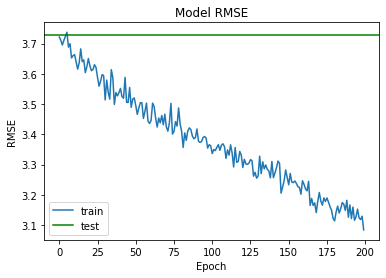

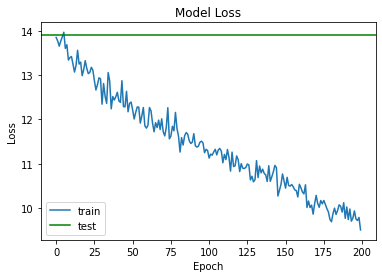

In [13]:
plt.plot(best_history.history['root_mean_squared_error'], label='train')
plt.axhline(test_rmse, color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='train')
plt.axhline(test_loss, color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

Could not save: plots\2022-03-28 20-03 Overall Acc Predicted and True vs Time for predicting turbidity.png
Possibly change datetime


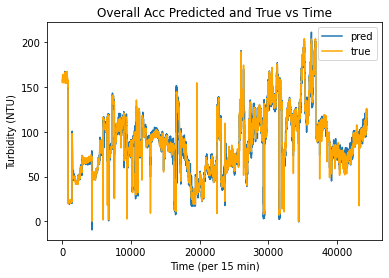

In [17]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Overall Acc Predicted and True vs Time')
plt.ylabel('Turbidity (NTU)')
plt.xlabel('Time (per 15 min)')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()


In [20]:
min(y_shaped)

0.13

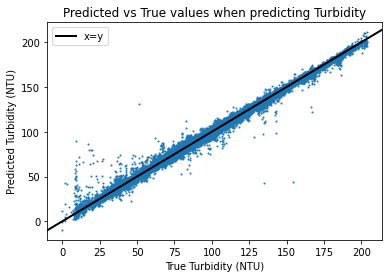

In [29]:
plt.scatter(y_shaped, pred, s=1)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, label="x=y", color='k', lw=2, scalex=False, scaley=False)
plt.title('Predicted vs True values when predicting Turbidity')
plt.xlabel('True Turbidity (NTU)')
plt.ylabel('Predicted Turbidity (NTU)')
plt.legend()
fpath = os.path.join("plots", now + " Predicted vs True values when predicting Turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()